# **Clustering and Dimension Reduction (~ 75 min)**

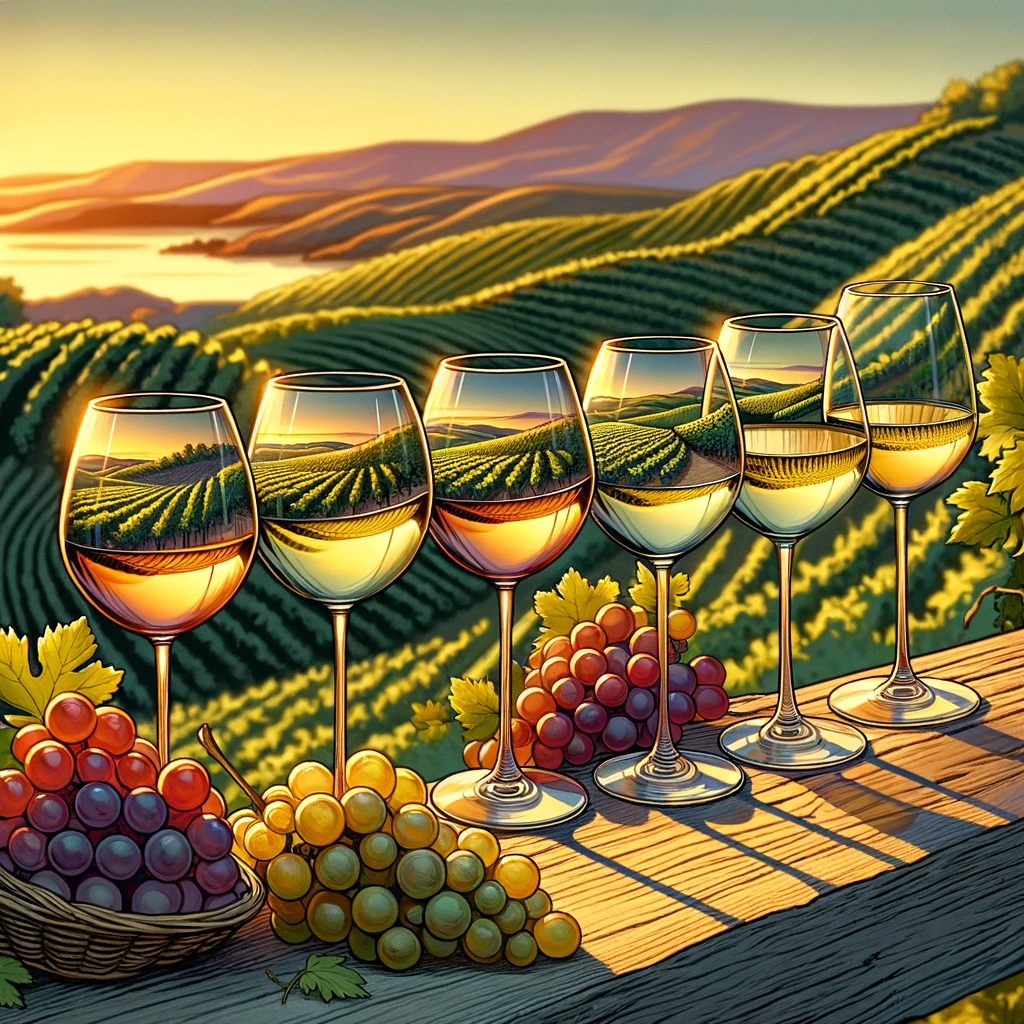

In this notebook we will study and work with the sk-learn Wine dataset, a classic dataset often used in machine learning for classification tasks. The Wine dataset consists of 178 samples, each characterised by 13 distinct features representing different chemical analyses of Italian wines from three different varieties. These features include a range of chemical properties such as alcohol content, malic acid, ash, alkalinity of ash, magnesium, total phenols, flavonoids, non-flavonoid phenols, proanthocyanins, colour intensity, hue, OD280/OD315 of diluted wines and proline. The primary aim of this notebook is to go through the clustering and dimensionality reduction techniques.


Our first objective will be to learn how to effectively cluster the samples in this dataset using the K-means function. This technique will involve grouping the wine samples based on their chemical properties, with the aim of identifying inherent structures within the data. Following the clustering process, we will turn our attention to evaluating the performance of our clustering function. Finally, we will explore three different dimensionality reduction techniques. These techniques are instrumental in simplifying the complexity of our dataset while retaining as much of the significant information as possible. By applying these methods, we aim to obtain a clearer, more accessible low-dimensional space visualisation of the features within the Wine dataset. This step is essential to better understand the relationships between different variables and to make our dataset more manageable for further analysis and interpretation.

## Import the necessary libraries and load the data (5 min):

1. The umap library is not pre-installed on your notebook. Install it with `!pip'.

2. Familiarise yourself with the required libraries and use an abbreviation to refer to them.

3. Load the dataset using the `load_wine()` function. Determine the number of different classes that are present. To get an initial overview, use `df.columns' and `pd.head()` to display the feature names and the first 5 records of the dataset.

In [1]:
import warnings
# Suppress warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
!pip install umap-learn

Defaulting to user installation because normal site-packages is not writeable
  Using cached importlib_metadata-6.7.0-py3-none-any.whl (22 kB)
  Attempting uninstall: importlib-metadata
    Found existing installation: importlib-metadata 3.4.0
    Uninstalling importlib-metadata-3.4.0:
      Successfully uninstalled importlib-metadata-3.4.0


You should consider upgrading via the 'c:\program files\python37\python.exe -m pip install --upgrade pip' command.


In [3]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import normalized_mutual_info_score

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap

ModuleNotFoundError: No module named 'plotly'

In [ ]:
df = # ... Your code goes here
df = df.frame
# print the shape of the dataset, the list of columns name, and the first 5 rows of dataset
print(df.shape)
print(list(df.columns))
df.head()

## Data Standardization (5 min):

In data science, "standardization" and "normalization" are two common techniques used to prepare data for machine learning algorithms. These techniques are critical for models that are sensitive to the scale and distribution of the data.

Standardization refers to transforming each feature to have a mean of zero and a standard deviation of one. This process is also known as z-score normalization. The formula for standardizing a characteristic is: $z = \frac{x - \mu}{\sigma}$.

Standardization does not bind values to a specific range. It's useful when you want to compare features that have different units or scales. It is essential for algorithms that assume the data is normally distributed, and for methods that are sensitive to the scale of the input features (e.g., PCA, SVM).

Normalization, on the other hand, typically refers to scaling individual samples so that they have unit norm length. It's more about changing the scale of the data without changing its distribution. The most commonly used norms are the L1 norm (also known as the Manhattan distance) and the L2 norm (Euclidean distance): $x_{\text{norm}} = \frac{x - x_{\text{min}}}{x_{\text{max}} - x_{\text{min}}}$.



Read more here:

https://developers.google.com/machine-learning/data-prep/transform/normalization

The `StandardScaler().fit_transform(df)` method from the scikit-learn library ensures that each feature contributes equally to the analysis. This method standardizes the features by removing the mean and scaling to unit variance, which is crucial for algorithms like K-means that are sensitive to the scale of the data. By applying this transformation, it helps improve the performance and accuracy of machine learning models, as they are not biased or skewed by the natural variance in the dataset.

1. Standardize the data using the sk-learn functions `StandardScaler().fit_transform(df)`.

2. Print the first 5 rows of data and compare them with the data before standardization.

In [ ]:
df_features = df.drop(['target'], axis=1)

scaler = # ... Your code goes here
features = # ... Your code goes here
features = # ... Your code goes here
# 3 lines of code in 1 line:
# features = StandardScaler().fit_transform(df_features)

# Convert to pandas Dataframe
# you may want to repeat the visualizaton again this time without the standardization
scaled_df = # ... Your code goes here)  # without
scaled_df = # ... Your code goes here     # with

# Print the scaled data
scaled_df.head(5)

## K-mean and Elbow Method (10 min)

Plotting the elbow curve for K-means clustering is essential for determining the optimal number of clusters (k) for the data set. The curve, which plots the number of clusters against a measure of cluster quality (such as WCSS: Within-Cluster Sum of Squares, or NMI: Normalized Mutual Information) typically shows a point where the rate of decrease changes sharply, known as the "elbow". This point indicates where adding more clusters does not significantly improve the clustering quality, thus providing a balance between the complexity of the model and the adequacy of the cluster representation.


WCSS (Within-Cluster Sum of Squares) and NMI (Normalized Mutual Information) are two metrics commonly used in clustering, a form of unsupervised learning in data science. Let's take a closer look at what each of these metrics means:

> WCSS (Within-Cluster Sum of Squares)
WCSS is a metric used to evaluate the performance of a clustering algorithm, most commonly k-means. It measures the sum of the squared distances between each point in a cluster and the centroid of that cluster. The formula for WCSS is $\text{WCSS} = \sum_{i=1}^{k} \sum_{x \in C_i} \| x - \mu_i \|^2$

$k$ is the number of clusters. $C_i$ is the set of points in the $i$th cluster. $x$ is a point in cluster $C_i$. $\mu_i$ is the centroid of cluster $C_i$. $\| x - \mu_i \|^2$ is the squared Euclidean distance between point $x$ and centroid $\mu_i$.

The goal in k-means is to minimize the WCSS, as a lower WCSS indicates that the points within each cluster are closer to their respective centroids, implying better compactness and separation of the clusters.

> NMI (Normalized Mutual Information)
NMI is a measure used to evaluate the quality of clustering, especially in scenarios where the true labels are known. It is based on mutual information (MI), which measures the amount of information about a random variable that can be obtained by observing another random variable. NMI normalizes this value to account for the size of the clusters and the distribution of the ground truth labels. The formula for NMI is $\text{NMI}(U, V) = \frac{2 \times \text{I}(U; V)}{H(U) + H(V)}$.

$U$ is the set of true class labels. $V$ is the set of cluster labels generated by the clustering algorithm. $\text{I}(U; V)$ is the mutual information between $U$ and $V$. $H(U)$ and $H(V)$ are the entropies of $U$ and $V$, respectively.

Read more here:

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.normalized_mutual_info_score.html


NMI values range from 0 to 1, where 1 indicates perfect clustering (i.e., the clustering algorithm perfectly predicts the true labels) and 0 indicates that the clustering is no better than random chance. The NMI is particularly useful for comparing the performance of different clustering algorithms, or the same algorithm with different parameters. Follow the steps below to complete the evaluation:



1. For a number of clusters ranging from 1 to 10, plot the elbow curve for kmeans clustering and select a final number of clusters.
2. Evaluate your kmeans with `kmeans.inertia_`. Create WCSS (Within-Cluster Sum of Squares): a dictionary to store the values for each num of clusters k
3. Use NMI `normalized_mutual_info_score()` to re-evaluate your k-means.

In [ ]:
# for num of clusters 1 to 10, plot the elbow curve
X = scaled_df.values
# WCSS (Within-Cluster Sum of Squares): a dictionary to store the values for each num of clusters k
wcss = {}
for i in range(1, 11):
    kmeans = # ... Your code goes here
    kmeans.fit(X)
    wcss[i] = # ... Your code goes here


plt.plot(wcss.keys(), wcss.values(), 'gs-')
plt.xlabel("Values of 'k'")
plt.ylabel('WCSS')
plt.show()

# according to the plot, choose the suitable number of clusters and fit the model
kmeans = # ... Your code goes here
kmeans.fit(X)
print(kmeans.cluster_centers_.shape) # (3, 13)
print(kmeans.cluster_centers_) # 3 clusters, 13 features
print(kmeans.labels_) # 178 samples, each sample belongs to one of the 3 clusters

# Evaluate your Kmeans
# get assigned labels and for input to the kmeans algorithm
labels = # ... Your code goes here
true_labels = # ... Your code goes here
kmeans_labels = # ... Your code goes here
nmi_score = normalized_mutual_info_score() # ... Your code goes here)
print("NMI Score: ", nmi_score)

## Dimensionality Reduction (10 min)


Dimensionality reduction of data features is a critical process in data analysis and machine learning, especially when dealing with high-dimensional datasets. Learn why it's important and the differences between PCA, t-SNE, and UMAP:
Importance of dimensionality reduction:
- Reduces computational complexity: By reducing the number of features, it makes algorithms faster and less computationally expensive.
- Mitigates the Curse of Dimensionality: High-dimensional spaces often lead to problems such as overfitting and sparsity of data; reducing dimensions can alleviate these problems.
- Finally, it improves data visualization: It's easier to visualize and interpret data in two or three dimensions than in higher-dimensional spaces.

### PCA (Principal Component Analysis):

Linear technique: PCA is a linear algorithm that identifies the directions (principal components) in which the data varies the most.
Global structure preservation: It's effective at preserving the global structure of the data, but may not capture complex, nonlinear relationships.
Scalability and interpretability: PCA scales well with large datasets, and the components can often be interpreted in terms of the original features.

Click here to learn more:
https://www.youtube.com/watch?v=HMOI_lkzW08


Follow the steps below to complete the tasks:

1. Reduce the dimension of the features to 2 using the imported PCA function `PCA()`.
2. Visualize the samples in 2D along with the centroids generated by Kmean with 3 clusters. Remember that you must also reduce the features of the centroids to visualize them in 2D.

In [ ]:
pca = # ... Your code goes here
reduced_X = pd.DataFrame(...) # ... Your code goes here
print(reduced_X.head())
# reduced centers features after PCA
centers = pca.transform(...) # ... Your code goes here
centers


# Scatter plot of the reduced data
plt.figure(figsize=(7,5))
plt.scatter(reduced_X['PCA1'],reduced_X['PCA2'],c=kmeans.labels_)
plt.scatter(centers[:,0],centers[:,1],marker='x',s=100,c='red')
plt.xlabel('dim1_after_PCA')
plt.ylabel('dim2_after_PCA')
plt.title('Wine Clusters')
plt.tight_layout()

#### Transforming the Features of a Sample into a Low-Dimensional Space: (15 min)

The goal of this exercise is to familiarize you with the process of transforming a high-dimensional data sample into a lower-dimensional space using PCA. You will work with a sample containing 13 features and project it into a 2D space.



To project a sample from a 13-dimensional space to a 2-dimensional space using a transformation matrix, you typically use a method such as Principal Component Analysis (PCA). Here's a simplified overview of the math behind this process:

1. **PCA Transformation Matrix:**
   - PCA begins by calculating the eigenvectors and eigenvalues from the covariance matrix of the data. These eigenvectors are the principal components.
   - In this case, to project down to 2D, you select the first two principal components.
   - Let's say your PCA transformation matrix $T$ consists of these two principal components, each of them being a 13-dimensional vector. Thus, $T$ will be a matrix of size $2 \times 13$.

2. **Sample in 13-dimensional space:**.
   - Suppose your sample in 13-dimensional space is a vector $X$ of size $13 \times$.

3. **Projection to 2D:**.
   - The projection of $X$ into the new 2D space is obtained by multiplying the transformation matrix $T$ with the sample vector $X$.
   - Mathematically, it's represented as $Y = TX$ , where $Y$ is your new 2D representation of the sample.
   - In terms of matrix dimensions, it looks like $(2 \times 13) \times (13 \times 1) = (2 \times 1)$. Thus, $Y$ is a 2-dimensional vector.

4. **Matrix Multiplication:**.
   - The actual calculation is the dot product between each row of $T$ and $X$. Each element of $Y$ is a sum of the products of the corresponding elements from the row of $T$ and $X$.

5. **Result:**
   - The resulting 2D vector $Y$ represents your original 13-dimensional sample projected into the space defined by the first two principal components. This 2D representation captures the most significant variance of the original data in two dimensions.

This process effectively reduces the dimensionality of the data while retaining the most important information as captured by the first two principal components. Now follow the steps below for implementation details:

1. Select a random sample from the data set.
2. Use `pca.transform` to transform the 13 features of this sample to 2D.
3. Plot a heatmap of the transform matrix `pca.components`.  
4. Using the transform matrix `pca.components` and the dot product function `np.dot` try to find the sample projection in 2D.

In [ ]:
# Heat map c
print(pca.components_.shape)
component_df = pd.DataFrame() # ... Your code goes here
sns.heatmap(component_df)
plt.show()

# use the PCA transfer matrix to transform the sample to low-dim space
sample = # ... Your code goes here
pca_transfer_Matrix = # ... Your code goes here
sample_2component = np.dot() # ... Your code goes here
# now use the PCA funciton
sample_transformed = # ... Your code goes here

print('----')
print('transfer with function  : ', sample_2component)
print('transfer with dotProduct: ', sample_transformed)

#### Dimensionality Reduction with PCA: (5 min)
1. Repeat the dimensionality reduction, this time to 3. Again using the imported PCA function `PCA()`.
2. Visualize the 3D components of the samples.
3. Also use the interactive visualization library.

In [ ]:
# Perform PCA for visualization with 3 components
pca = # ... Your code goes here
X_pca = # ... Your code goes here

# Plot the first three principal components in 3D
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# in the scatter plot bellow, GIVE EACH SAMPLE A COLOR ACCORDING TO ITS TARGET VALUE
scatter = ax.scatter() # ... Your code goes here


plt.colorbar(scatter, label='Digit')
ax.set_title('PCA Visualization of Wine Data (3D)')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.show()

fig = px.scatter_3d() # ... Your code goes here
fig.show()

### t-SNE : t-Distributed Stochastic Neighbor Embedding (7 min):

Nonlinear Technique: t-SNE is a nonlinear, probabilistic technique used primarily for visualizing high-dimensional data in 2D or 3D.
Local structure preservation: It excels at revealing local structure and clustering in data, often at the expense of global structure.
Computational complexity: t-SNE can be computationally intensive, especially on large datasets, and its results can vary depending on the parameters chosen.

1. Reduce the dimension of the features to 2 using the imported `TSNE()` function.
2. Visualize the samples in 2D.

In [ ]:
# Perform t-SNE
tsne = # ... Your code goes here
X_tsne = # ... Your code goes here

# Visualize the results
plt.figure(figsize=(10, 8))
plt.scatter() # ... Your code goes here
plt.colorbar()
plt.title('t-SNE Visualization of Wine Data')
plt.show()


### UMAP : Uniform Manifold Approximation and Projection (8 min):

Nonlinear technique: Like t-SNE, UMAP is a nonlinear method, but it's based on manifold learning with superior scalability. Balance between local and global structure: UMAP preserves more of the global structure than t-SNE, while also revealing local structures. Versatility and speed: It works faster than t-SNE on large datasets and can be applied more broadly, including in tasks beyond visualization, such as supervised dimensionality reduction.

1. Reduce the dimension of the features to 2 with the imported function `umap.UMAP()`.
2. Visualize the samples in 2D.

In [ ]:
# Perform UMAP dimensionality reduction
reducer = # ... Your code goes here
embedding = # ... Your code goes here

# Visualize the results
plt.figure(figsize=(10, 8))
plt.scatter() # ... Your code goes here
plt.colorbar()
plt.title('UMAP Visualization of Wine Data')
plt.show()

### PCA, t-SNE, Umap
Each of these methods has its strengths and is suited to different types of datasets and analysis goals. PCA is often the first choice for linear dimensionality reduction and overview analysis, while t-SNE and UMAP are more suited to detailed exploratory analysis, especially when the data has complex, non-linear relationships.

### Questionnaire
Hope you enjoyed the exercise! 
Before you leave, please fill in our questionnaire (link via the qr code below).
Thank you!

<img src="https://github.com/albarqounilab/SAAI-Summer-School/raw/main/questionnaires/Clustering_question_qr.png" width="200" height="100"/>